<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/ORB_image_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from skimage import data
from skimage import transform
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.color import rgb2gray
from google.colab import drive
import matplotlib.pyplot as plt
import cv2

In [31]:
drive.mount('/content/drive')

image_path_1 = '/content/drive/MyDrive/Colab Notebooks/dataset/image_matching/image1.jpeg'
image_path_2 = '/content/drive/MyDrive/Colab Notebooks/dataset/image_matching/image2.jpeg'
image_path_3 = '/content/drive/MyDrive/Colab Notebooks/dataset/image_matching/image3.jpeg'
# image_path_4 = '/content/drive/MyDrive/Colab Notebooks/dataset/image_matching/image4.jpeg'

image1 = cv2.imread(image_path_1)
image2 = cv2.imread(image_path_2)
image3 = cv2.imread(image_path_3)
# image4 = cv2.imread(image_path_4)

# tform = transform.AffineTransform(rotation=90)

# image4Transform = transform.warp(image4, tform)

img1 = rgb2gray(image1)
img2 = rgb2gray(image2)
img3 = rgb2gray(image3)
# img4 = rgb2gray(image4Transform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

# descriptor_extractor.detect_and_extract(img4)
# keypoints4 = descriptor_extractor.keypoints
# descriptors4 = descriptor_extractor.descriptors

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


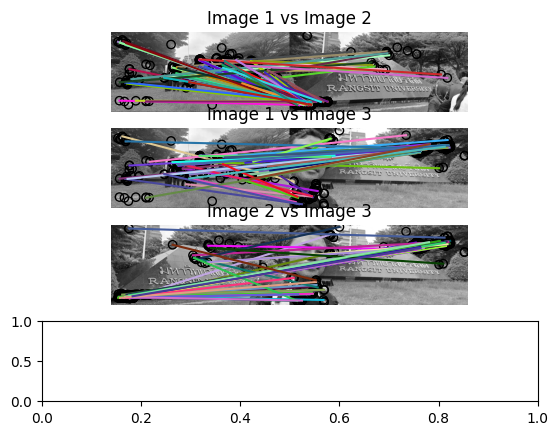

In [32]:
matches1 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches2 = match_descriptors(descriptors1, descriptors3, cross_check=True)
matches3 = match_descriptors(descriptors2, descriptors3, cross_check=True)
# matches4 = match_descriptors(descriptors2, descriptors4, cross_check=True)

fig, ax = plt.subplots(nrows=4, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches1)
ax[0].axis('off')
ax[0].set_title("Image 1 vs Image 2")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches2)
ax[1].axis('off')
ax[1].set_title("Image 1 vs Image 3")

plot_matches(ax[2], img2, img3, keypoints2, keypoints3, matches3)
ax[2].axis('off')
ax[2].set_title("Image 2 vs Image 3")

# plot_matches(ax[3], img2, img4, keypoints2, keypoints4, matches4)
# ax[3].axis('off')
# ax[3].set_title("Image 2 vs Image 3")

plt.show()